In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load and Prepare Market Data

In [2]:
market = pd.read_csv("data/market.csv", parse_dates=["date"])
market.set_index("date", inplace=True)
market.sort_index(inplace=True)

# Compute daily returns
returns = market.pct_change().dropna()
returns.rename(columns={"SP500": "SP500_return", "BONDS": "10Y_return"}, inplace=True)

Initialize Simulation Variables

In [3]:
initial_balance = 1_000_000
balance = initial_balance
withdrawal_rate = 0.05
tax_rate = 0.15

withdrawals = []
history = []

Run Simulation Loop

In [4]:
for day_index, (date, row) in enumerate(returns.iterrows()):
    sp500_return = row["SP500_return"]
    ten_year_return = row["10Y_return"]

    weights = {"SP500": 0.8, "10Y": 0.2}
    portfolio_return = sp500_return * weights["SP500"] + ten_year_return * weights["10Y"]
    gain = balance * portfolio_return
    balance += gain

    if day_index % 365 == 0 and withdrawal_rate > 0:
        withdrawal = withdrawal_rate * balance
        tax = tax_rate * withdrawal
        balance -= (withdrawal + tax)
    else:
        withdrawal = 0

    withdrawals.append(withdrawal)
    history.append(balance)

    if balance <= 0:
        balance = 0
        break

Visualize Results

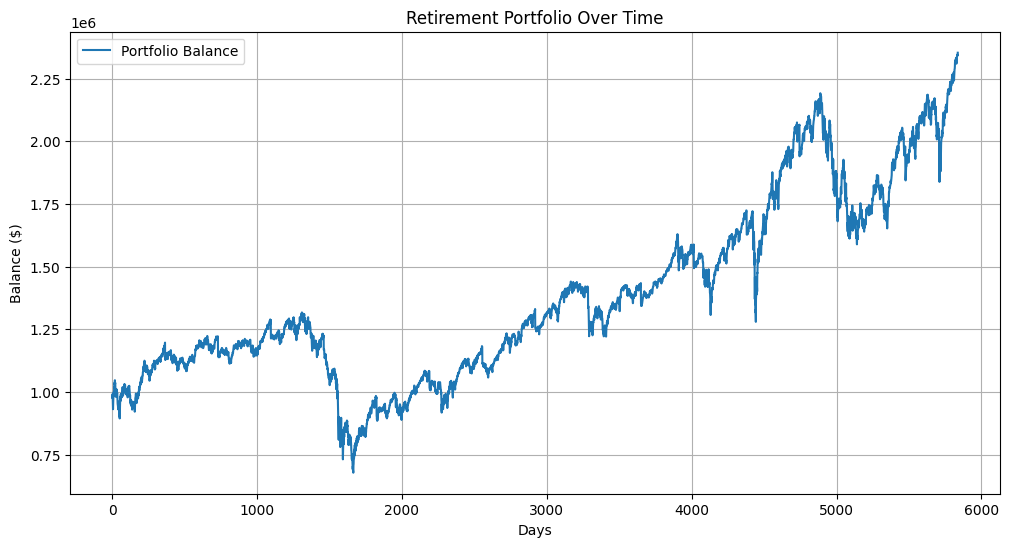

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(history, label="Portfolio Balance")
plt.title("Retirement Portfolio Over Time")
plt.xlabel("Days")
plt.ylabel("Balance ($)")
plt.legend()
plt.grid(True)
plt.show()

Print Annual Withdrawals

In [6]:
print("Annual withdrawals by year:")
for year, amount in enumerate(withdrawals[::365], start=1):
    print(f"Year {year}: ${amount:,.2f}")

Annual withdrawals by year:
Year 1: $51,816.49
Year 2: $60,014.16
Year 3: $61,187.42
Year 4: $64,417.27
Year 5: $61,954.04
Year 6: $47,906.30
Year 7: $53,974.25
Year 8: $59,024.38
Year 9: $66,610.46
Year 10: $70,824.93
Year 11: $71,698.15
Year 12: $79,637.83
Year 13: $86,351.95
Year 14: $102,925.54
Year 15: $87,822.85
Year 16: $99,428.96


In [10]:
print(len(returns))

5838


In [11]:
print(market.tail())

             SP500  BONDS
date                     
2025-10-02  669.22  89.55
2025-10-03  669.21  89.38
2025-10-06  671.61  88.67
2025-10-07  669.12  89.18
2025-10-08  673.11  89.25


In [7]:
market = pd.read_csv("data/market.csv", parse_dates=["date"])
market.set_index("date", inplace=True)
market.sort_index(inplace=True)


In [9]:
print("Start:", market.index.min())
print("End:", market.index.max())
print("Total rows:", len(market))

Start: 2002-07-26 00:00:00
End: 2025-10-08 00:00:00
Total rows: 5839


In [10]:
import pandas as pd
df = pd.read_csv("data/market.csv")
print(df.columns)

Index(['date', 'SP500', 'BONDS'], dtype='object')


In [11]:
import pandas as pd
from retirement_engine.simulator import run_simulation
from retirement_engine.plotting import plot_balance  # if modularized

In [12]:
withdrawal_rate = 0.05
sp500_weight = 0.60
etf_source = "market.csv"

In [13]:
history, withdrawals = run_simulation(withdrawal_rate, sp500_weight, etf_source)

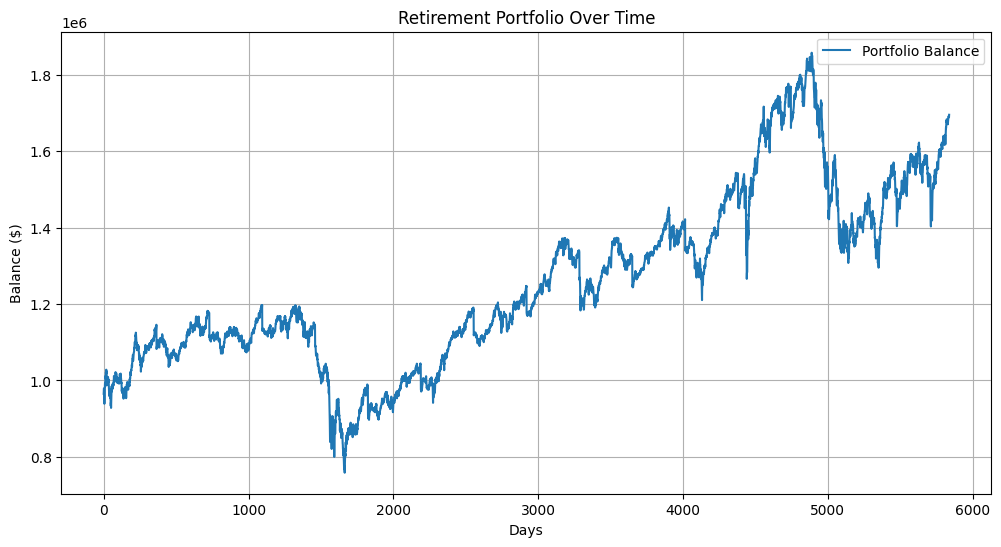

In [14]:
plot_balance(history)

In [16]:
print(type(history))
print(history[:5])  # Show first 5 entries

<class 'list'>
[np.float64(965067.9400585259), np.float64(973088.8746681327), np.float64(979323.791334802), np.float64(966213.7740051411), np.float64(957177.1732538108)]


In [17]:
etf_df = pd.read_csv("data/market.csv")
dates = pd.to_datetime(etf_df["date"])


In [19]:
dates = pd.to_datetime(etf_df["date"])[:len(history)]

In [20]:
history_df = pd.DataFrame({
    "date": dates,
    "balance": history
})
history_df.set_index("date", inplace=True)
history_df.head()

,balance
date,
2002-07-26,965067.940059
2002-07-29,973088.874668
2002-07-30,979323.791335
2002-07-31,966213.774005
2002-08-01,957177.173254


In [21]:
history, withdrawals = run_simulation(withdrawal_rate, sp500_weight, etf_source)

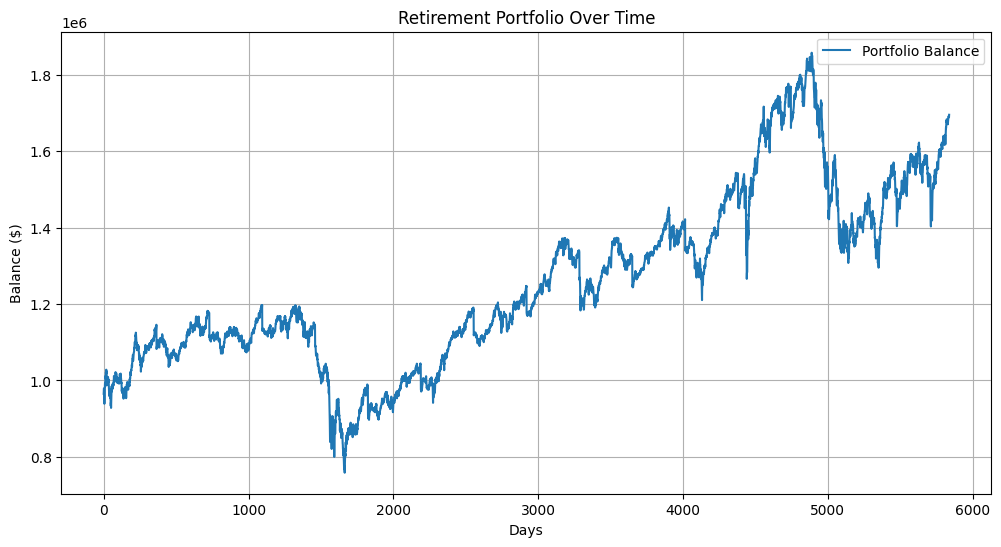

In [22]:
plot_balance(history)

In [24]:
print(withdrawal_rate,sp500_weight,etf_source)


0.05 0.6 market.csv
